<a href="https://colab.research.google.com/github/Modnarudom/modProject/blob/main/House_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prediction


![บ้าน](./content/บ้าน.jpg)


## describe predictor

| predictor | describe|
|  --- | ---|
|BHK| Number of Bedrooms, Hall, Kitchen.|
| Rent | Rent of the Houses/Apartments/Flats.|
|Size| Size of the Houses/Apartments/Flats in Square Feet.|
|Floor| Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example| Ground out of 2, 3 out of 5, etc.)|
|Area Type| Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.|
|Area Locality| Locality of the Houses/Apartments/Flats.|
|City| City where the Houses/Apartments/Flats are Located.|
|urnishing Status| Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.|
|Tenant Preferred| Type of Tenant Preferred by the Owner or Agent.|
|Bathroom| Number of Bathrooms.|
|Point of Contact| Whom should you contact for more information regarding the Houses/Apartments/Flats.|

### Loading Data

In [1]:
!unzip -q "/content/data.zip"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

In [2]:
df = pd.read_csv("House_Rent_Dataset.csv")
df.head().T

,0,1,2,3,4
Posted On,2022-05-18,2022-05-13,2022-05-16,2022-07-04,2022-05-09
BHK,2,2,2,2,2
Rent,10000,20000,17000,10000,7500
Size,1100,800,1000,800,850
Floor,Ground out of 2,1 out of 3,1 out of 3,1 out of 2,1 out of 2
Area Type,Super Area,Super Area,Super Area,Super Area,Carpet Area
Area Locality,Bandel,"Phool Bagan, Kankurgachi",Salt Lake City Sector 2,Dumdum Park,South Dum Dum
City,Kolkata,Kolkata,Kolkata,Kolkata,Kolkata
Furnishing Status,Unfurnished,Semi-Furnished,Semi-Furnished,Unfurnished,Unfurnished
Tenant Preferred,Bachelors/Family,Bachelors/Family,Bachelors/Family,Bachelors/Family,Bachelors


###Data Analysis and Data Visualization

In [3]:
df.info()
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


,dtype
Posted On,object
BHK,int64
Rent,int64
Size,int64
Floor,object
Area Type,object
Area Locality,object
City,object
Furnishing Status,object
Tenant Preferred,object


In [4]:
pd.DataFrame(df.isna().sum()).rename(columns={0:"Null Value"})

,Null Value
Posted On,0
BHK,0
Rent,0
Size,0
Floor,0
Area Type,0
Area Locality,0
City,0
Furnishing Status,0
Tenant Preferred,0


In [5]:
df.describe(include ="O").T

,count,unique,top,freq
Posted On,4746,81,2022-07-06,311
Floor,4746,480,1 out of 2,379
Area Type,4746,3,Super Area,2446
Area Locality,4746,2235,Bandra West,37
City,4746,6,Mumbai,972
Furnishing Status,4746,3,Semi-Furnished,2251
Tenant Preferred,4746,3,Bachelors/Family,3444
Point of Contact,4746,3,Contact Owner,3216


In [6]:
df.drop("Posted On", axis = 1, inplace = True)

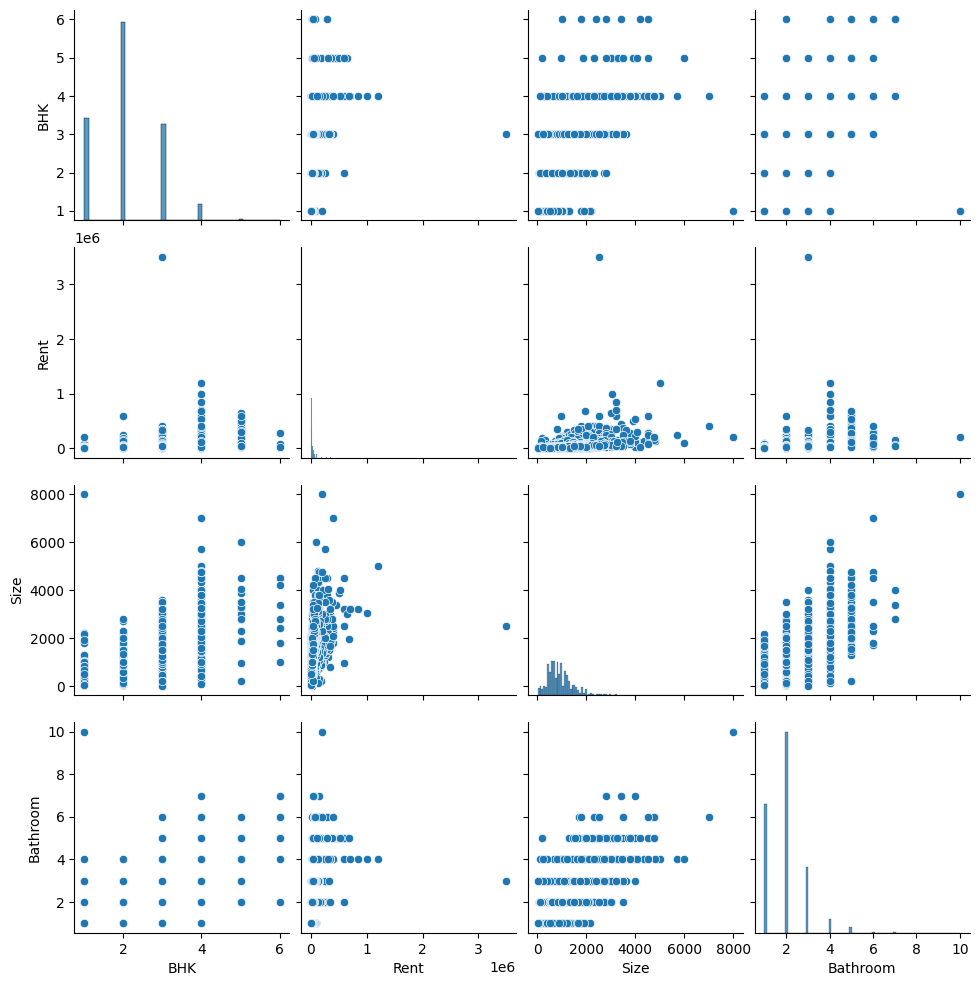

In [7]:
sns.pairplot(df)

<ipython-input-8-3b5dead68104>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Rent"] )


<Axes: xlabel='Rent', ylabel='Density'>

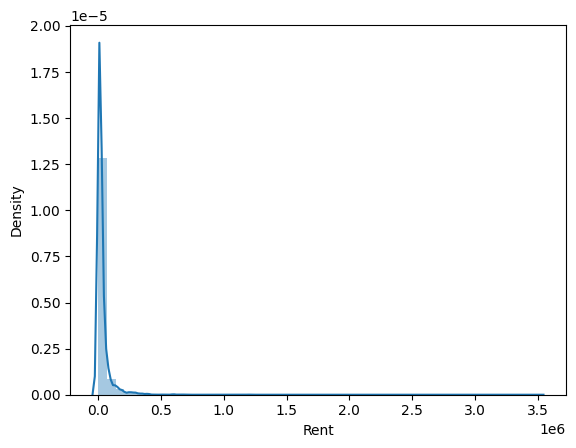

In [8]:
sns.distplot(df["Rent"] )

### Create a model without manipulating data.

In [9]:
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

In [10]:
df_1 = pd.get_dummies(df, columns=['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'])
df_1.drop(['Area Locality','Floor'],axis=1,inplace = True)
df_1.head()

,BHK,Rent,Size,Bathroom,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,City_Bangalore,City_Chennai,City_Delhi,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2,10000,1100,2,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,2,20000,800,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
2,2,17000,1000,1,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,2,10000,800,1,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,2,7500,850,1,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1


In [11]:
X = df_1.drop('Rent',axis=1)
y = df_1['Rent']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=101)

In [14]:
start_time = time.time()
lr = LinearRegression()
lr.fit(X_train,y_train)
end_time = time.time()

# Calculate the training time
training_time = end_time - start_time

In [15]:
#evaluation_metrics
def evaluation_metrics(X_test, y_test, lr, training_time):
    # Predictions
    lr_prediction = lr.predict(X_test)

    # Compute evaluation metrics
    mae_lr = metrics.mean_absolute_error(y_test, lr_prediction)
    mse_lr = metrics.mean_squared_error(y_test, lr_prediction)
    rmse_lr = np.sqrt(mse_lr)

    # Create a dictionary for the metrics
    metrics_dict = {
        'Metric': ['MAE', 'MSE', 'RMSE', 'Training Time'],
        'Value': [mae_lr, mse_lr, rmse_lr, training_time]
    }

    # Create a DataFrame without an indexfz
    metrics_df = pd.DataFrame(metrics_dict)

    # Set the 'Metric' column as the index
    metrics_df.set_index('Metric', inplace=True)

    # Display the metrics
    print('MAE:', mae_lr)
    print('MSE:', mse_lr)
    print('RMSE:', rmse_lr)
    print(f'Training time: {training_time} seconds')

    return metrics_df

In [17]:
evaluation_metrics(X_test,y_test,lr,training_time)

MAE: 21390.973707870213
MSE: 2288917361.2812414
RMSE: 47842.63121193525
Training time: 0.011470556259155273 seconds


,Value
Metric,
MAE,2.139097e+04
MSE,2.288917e+09
RMSE,4.784263e+04
Training Time,1.147056e-02


### Create a model with scaling the data.

In [18]:
# Scaling the data
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_scale = sc_X.fit_transform(X_train)
X_test_scale = sc_X.fit_transform(X_test)
y_train_scale = sc_X.fit_transform(y_train)
y_test_scale = sc_y.fit_transform(y_test)

In [23]:
print(X_train_scale,y_train_scale)

[[-0.11410116 -0.35874955  0.02565701 ... -0.69484711 -0.01623283
   0.69526394]
 [ 1.07908889  0.38685503  1.14512848 ...  1.43916553 -0.01623283
  -1.43830269]
 [-0.11410116 -0.11747876  0.02565701 ... -0.69484711 -0.01623283
   0.69526394]
 ...
 [-0.11410116 -0.43502225  0.02565701 ...  1.43916553 -0.01623283
  -1.43830269]
 [ 1.07908889  0.22652669  0.02565701 ...  1.43916553 -0.01623283
  -1.43830269]
 [-0.11410116  0.19383839  0.02565701 ... -0.69484711 -0.01623283
   0.69526394]] [[-0.29027836]
 [ 1.17022338]
 [-0.19126129]
 ...
 [ 0.24193838]
 [ 0.48948104]
 [-0.15412989]]


In [21]:
start_time = time.time()
lr_scaling = LinearRegression()
lr_scaling.fit(X_train_scale,y_train_scale)
end_time = time.time()

# Calculate the training time
training_time_scaling = end_time - start_time

In [22]:
evaluation_metrics(X_test_scale,y_test_scale,lr_scaling,training_time_scaling)

MAE: 95539580528.99138
MSE: 1.3637966771802771e+22
RMSE: 116781705638.35233
Training time: 0.007208347320556641 seconds


,Value
Metric,
MAE,9.553958e+10
MSE,1.363797e+22
RMSE,1.167817e+11
Training Time,7.208347e-03
